In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
def f(U):
    return U[:-4] - U[4:] + 8 * (U[3:-1] - U[1:-3])

In [146]:
def errs_for_different_h(N_errs, Cu, c, L):
    H = np.array([2 ** -i for i in range(N_errs)])
    #N_errs = H.size
    errs = np.zeros(N_errs)
    fig, axs = plt.subplots(N_errs, 1, figsize = (10, 8))
    
    for i, h in zip(range(N_errs), H):
        Nx = int(L / h)
        #r = 42
        #Cu = c * r * h ** (1. / 3.)
        #dt = (Cu / c / r)**4
        Nt = int(100 / h / Cu)
        #Nt = int(100 / c / dt)
        #dt = Cu * h / c
        x = np.linspace(0, 3000, Nx)
        #print(Nt)

        def init(x0, x1):
            U = np.zeros(Nx)
            U[x0:x1] = np.abs(np.sin((x[x0:x1] - x[x0]) * np.pi / (x[x1] - x[x0])) ** 3)
            return U
        
        def solve(U, Nt, Cu):
            for n in range(Nt - 1):
                #U[1:] = U[1:] - Cu * (U[1:] - U[:-1]) # first + first
                
                #U[2:] = U[2:] - Cu * (U[0:-2] - 4 * U[1:-1] + 3 * U[2:]) / 2 # first + second
                U[2:-2] = U[2:-2] - Cu * (U[:-4] - U[4:] + 8 * (U[3:-1] - U[1:-3])) / 12
                #U[n + 1, 3:-3] = U[n, 3:-3] - Cu * (U[n, 6:] - U[n, :-6] + 9 * (U[n, 1:-5] - U[n, 5:-1]) + 45 * (U[n, 4:-2] - U[n, 2:-4])) / 60
                
                #U_star = np.zeros(Nx)
                #U_star[2:-2] = U[n, 2:-2] + 0.5 * Cu / 12. * f(U[n, :])
                #U[n + 1, 2:-2] = U[n, 2:-2] + Cu / 12. * f(U_star)
            return U
        
        x0 = int(Nx / 2) - int(20 / h)
        x1 = x0 + int(40 / h)
        U = init(x0, x1)
        U_n = solve(U, Nt, Cu)
        U_ex = init(x0 + int(Nt * Cu), x1 + int(Nt * Cu))
        errs[i] = np.sqrt(np.sum((U_n[x0 + int(Nt * Cu): x1 + int(Nt * Cu)] - U_ex[x0 + int(Nt * Cu): x1 + int(Nt * Cu)]) ** 2 * h))
        
        axs[i].plot(x[x0 + int(Nt * Cu)-100: x1 + int(Nt * Cu) + 100], U_n[x0 + int(Nt * Cu) - 100: x1 + int(Nt * Cu) + 100], label = 'h = ' + str(h));
        axs[i].plot(x[x0 + int(Nt * Cu)-100: x1 + int(Nt * Cu) + 100], U_ex[x0 + int(Nt * Cu) - 100: x1 + int(Nt * Cu) + 100], label = 'exact');
        axs[i].legend()
    return H, errs

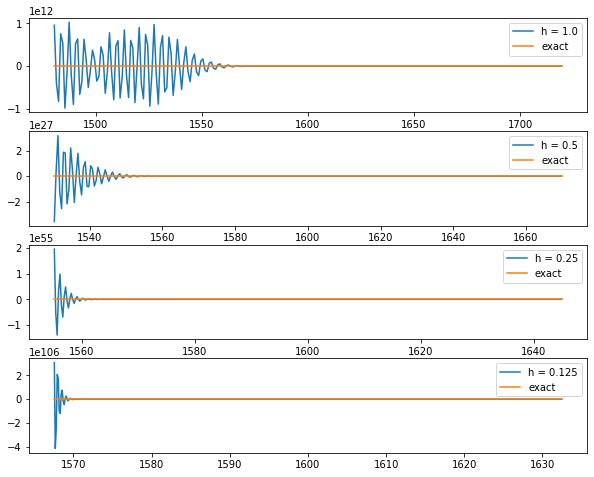

In [147]:
c = 1.
Cu = 0.5
L = 3000.
#H = np.array([1, 0.5, 0.25])
H, errs = errs_for_different_h(4, Cu, c, L)

2.562741203051932e-15


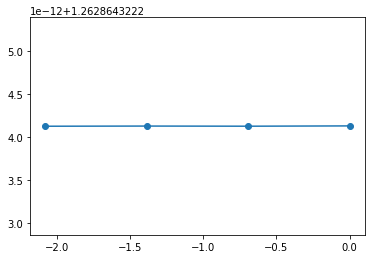

In [145]:
plt.plot(np.log(H), np.log(errs), '-o');
print(np.log(errs[-2] / errs[-1]) / np.log(2.))